# Hands on Python for Data Science


### Master II Livello - Data Science and Statistical Learning (MD2SL) 2020-2021

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2020/2021<br/>
June, 12 2021

# Lecture 1: Introduction to <code>pandas</code> and other stuff

## What is <code>pandas</code>?

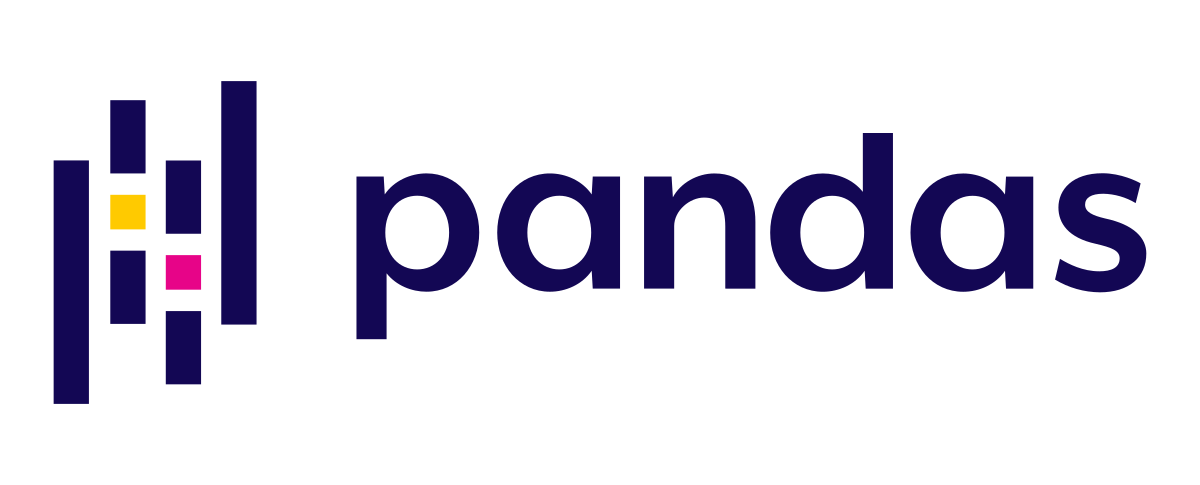

## What *is* <code>pandas</code>?

-  Very likely, one of the most important tool for a (Pythonista) Data Scientist!

-  It contains data structures and data manipulation tools designed to make data **cleaning** and **analysis** fast and easy in Python.

-  Acronym derived from "**p**ython **an**d **d**ata **a**nalysi**s**" or, maybe, "**pan**el **da**ta".

## What Does It Provide Us With?

-  Often used in tandem with numerical computing tools like <code>**numpy**</code> and <code>**scipy**</code>, as well as machine learning modules like <code>**scikit-learn**</code> and <code>**statsmodels**</code>, and data visualization libraries like <code>**matplotlib**</code> and <code>seaborn</code>. 

-  It uses significant parts of <code>**numpy**</code> style of array-based computing, especially vectorized functions for data processing without <code>**for**</code> loops.

-  You can find more about <code>**pandas**</code> on the official [website](http://pandas.pydata.org/).

In [1]:
"""
We import numpy as we will need it very often in combination with pandas
"""
import numpy as np
"""
As any other third-party module, the pandas module has to be imported before it can be used.
If you installed Python with Anaconda, pandas would be just available to you.
This is usually how pandas is imported and aliased. Although you could also
use another syntax like 'from pandas import *', I strongly encourage you to define an alias,
as this will help you to identify pandas' functions in your code.
"""
import pandas as pd

## Introduction to <code>pandas</code> Data Structures

-  Two workhorse data structures: <code>**Series**</code> and <code>**DataFrame**</code>. 

-  While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

## <code>Series</code>

-  A <code>**Series**</code> is a one-dimensional array-like object containing a **sequence of values** (similar to <code>**numpy**</code>'s arrays) and an associated array of data labels, called its <code>**index**</code>.

-  The string representation of a <code>**Series**</code> displayed interactively shows the index on the left and the values on the right. 

-  If no index is specified for the data, a default one consisting of the integers $0$ through $n-1$ (where $n$ is the length of the data) is created.

In [2]:
# Create a Series object (from a bulit-in Python list)
s = pd.Series([4, 7, -5, 3])
# Print the string representation of the Series object above
print(s)
print()
# We can get the array representation and index object of the Series 
# via its values and index attributes, respectively
# Print the array of values
print("The values of the Series object are: {}".format(s.values))
# Print the array of indices
print("The index of the Series object is: {}".format(s.index)) # like range(4)

0    4
1    7
2   -5
3    3
dtype: int64

The values of the Series object are: [ 4  7 -5  3]
The index of the Series object is: RangeIndex(start=0, stop=4, step=1)


In [3]:
"""
Often it will be desirable to create a Series with an index 
identifying each data point with a label.
"""
s2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(s2)
print()
print("The index of the Series object is: {}".format(s2.index))

d    4
b    7
a   -5
c    3
dtype: int64

The index of the Series object is: Index(['d', 'b', 'a', 'c'], dtype='object')


In [4]:
"""
Compared with numpy arrays, you can use values in the index 
when selecting single values or a set of values.
"""
# Accessing the element using the index value (i.e., not just an integer as with numpy!)
print("The value indexed by 'a' is: {}".format(s2['a']))
# Assign a new value corresponding to an index
s2['c'] = 42
print("After the assignment, the new Series object is:\n{}".format(s2))
print()
# Indexing a subset of the elements using a subset of the index
print("The sub-series is:\n{}".format(s2[['c', 'b', 'd']]))

The value indexed by 'a' is: -5
After the assignment, the new Series object is:
d     4
b     7
a    -5
c    42
dtype: int64

The sub-series is:
c    42
b     7
d     4
dtype: int64


In [5]:
"""
Using numpy functions or numpy-like operations, such as filtering with a boolean array, 
scalar multiplication, or applying math functions, will preserve the index-value link.
"""
print("Select only the strictly positive elements of the series:\n{}".format(s2[s2 > 0]))
print()
double_s2 = s2 * 2
print("Double each element of the series:\n{}".format(double_s2))
print()
exp_s2 = np.exp(s2)
print("Apply the exponential function to each element of the series:\n{}".format(exp_s2))
# Note the implicit type conversion after the operation above

Select only the strictly positive elements of the series:
d     4
b     7
c    42
dtype: int64

Double each element of the series:
d     8
b    14
a   -10
c    84
dtype: int64

Apply the exponential function to each element of the series:
d    5.459815e+01
b    1.096633e+03
a    6.737947e-03
c    1.739275e+18
dtype: float64


In [6]:
"""
Another way to think about a pandas Series is as a fixed-length, ordered built-in dict, 
as it is a mapping of index values to data values. 
Therefore, Series can be used in many contexts where you might use a dict.
"""
# Suppose you have a dictionary containing the following key-value pairs
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
# You can create a Series object from the dictionary above
s3 = pd.Series(sdata)
print("The series object created from the dictionary is:\n{}".format(s3))

The series object created from the dictionary is:
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [7]:
"""
When only passing a dict, the index in the resulting Series will have the dict's keys
in sorted order. You can override this by passing the dict keys 
in the order you want them to appear in the resulting Series.
"""
states = ['California', 'Texas', 'Oregon', 'Ohio']
s4 = pd.Series(sdata, index=states)
print("The series object created from the dictionary and index is:\n{}".format(s4))

The series object created from the dictionary and index is:
California        NaN
Texas         71000.0
Oregon        16000.0
Ohio          35000.0
dtype: float64


In [8]:
"""
Here, 3 values found in sdata were placed in the appropriate locations, 
but since no value for 'California' was found, it appears as NaN (Not a Number),
which is considered in pandas to mark missing or NA values. 
We will use the terms "missing" or "NA" to refer to missing data. 
The 'isnull' and 'notnull' functions in pandas should be used to detect missing data.
"""
# Test for NA
# We can either invoke the method on the Series object
print("Check which elements of the series are null:\n{}".format(s4.isnull()))
# Or use the standard pandas function and pass the Series as input argument
#print("Check which elements of the series are null:\n{}".format(pd.isnull(s4)))

Check which elements of the series are null:
California     True
Texas         False
Oregon        False
Ohio          False
dtype: bool


In [9]:
# Test for NOT NA
# We can either invoke the method on the Series object
print("Check which elements of the series are NOT null:\n{}".format(s4.notnull()))
# Or use the standard pandas function and pass the Series as input argument
#print("Check which elements of the series are NOT null:\n{}".format(pd.notnull(s4)))

Check which elements of the series are NOT null:
California    False
Texas          True
Oregon         True
Ohio           True
dtype: bool


In [10]:
"""
Series automatically aligns differently-indexed data in arithmetic operations.
"""
print("Series s3:\n{}".format(s3))
print()
print("Series s4:\n{}".format(s4))
print()
print("Series s3 + s4:\n{}".format(s3 + s4))

Series s3:
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Series s4:
California        NaN
Texas         71000.0
Oregon        16000.0
Ohio          35000.0
dtype: float64

Series s3 + s4:
California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [11]:
"""
Both the Series object itself and its index have a name attribute, 
which integrates with other key areas of pandas functionality.
"""
s4.name = 'population'
s4.index.name = 'state'
print(s4)

state
California        NaN
Texas         71000.0
Oregon        16000.0
Ohio          35000.0
Name: population, dtype: float64


In [12]:
"""
A Series's index can be altered in place by assignment.
"""
s4.index = ['Alice', 'Bob', 'Carl', 'Denise']
print(s4)
# What happens if there is a length mismatch between the old and the new index?

Alice         NaN
Bob       71000.0
Carl      16000.0
Denise    35000.0
Name: population, dtype: float64


In [13]:
"""
A Series's index can be altered in place by assignment.
"""
s4.index = ['Alice', 'Bob', 'Carl', 'Denise', 'Eddie', 'Fran']
print(s4)

ValueError: ignored

## <code>DataFrame</code>

-  A <code>**DataFrame**</code> represents a rectangular table of data and contains an **ordered collection of columns**.

-  Each column can be a different value type (numeric, string, boolean, etc.).

-  The <code>**DataFrame**</code> has both a row and column index; it can be thought of as a dict of <code>**Series**</code> all sharing the same index. 

-  Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays (the exact details are outside the scope of this class).


<span style="color: red">**NOTE:**</span>
While a <code>**DataFrame**</code> is physically two-dimensional, you can use it to represent higher-dimensional data in a tabular format using **hierarchical indexing**, one of the more advanced data-handling features in <code>**pandas**</code>.

In [26]:
"""
There are many ways to construct a DataFrame, 
though one of the most common is from a dict of equal-length lists or numpy arrays.
"""
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'population': [1.5, 1.7, 3.6, 2.4, 2.9]}

df = pd.DataFrame(data)
# The resulting DataFrame will have its index assigned automatically as with Series, 
# and the columns are placed in sorted order
print("The DataFrame created is as follows:\n{}".format(df))

The DataFrame created is as follows:
    state  year  population
0    Ohio  2000         1.5
1    Ohio  2001         1.7
2    Ohio  2002         3.6
3  Nevada  2001         2.4
4  Nevada  2002         2.9


In [27]:
"""
When you work with large DataFrames it is useful to show the first n rows
The 'head()' method without any input argument returns the first 5 rows.
Otherwise, you can call the method specifying the number of records to be displayed.
"""
print(df.head())
# You can also just type head()
df.head()

    state  year  population
0    Ohio  2000         1.5
1    Ohio  2001         1.7
2    Ohio  2002         3.6
3  Nevada  2001         2.4
4  Nevada  2002         2.9


,state,year,population
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
"""
If you specify a sequence of columns at creation time, 
the DataFrame's columns will be arranged in that order.
"""
# Note that column names must reflect key names of the input dictionary 'data'
df2 = pd.DataFrame(data, columns=['year', 'state', 'population'])
print(df2)

   year   state  population
0  2000    Ohio         1.5
1  2001    Ohio         1.7
2  2002    Ohio         3.6
3  2001  Nevada         2.4
4  2002  Nevada         2.9


In [29]:
"""
If you pass a column that isn't contained in the dict, 
it will appear with missing values (NaN) in the result.
"""
# Here we are adding an extra column 'debt' and we assign a string-based index,
# instead of the default integer range.
df3 = pd.DataFrame(data, columns=['year', 'state', 'population', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five'])
print(df3)

       year   state  population debt
one    2000    Ohio         1.5  NaN
two    2001    Ohio         1.7  NaN
three  2002    Ohio         3.6  NaN
four   2001  Nevada         2.4  NaN
five   2002  Nevada         2.9  NaN


In [30]:
"""
A column in a DataFrame can be retrieved as a Series,
either by dict-like notation or by attribute.
"""
# Accessing column using dict-like notation
print(df3['state'])
print()
# Accessing column using attribute ('.column_name') notation
print(df3.population)

# Note that the returned Series have the same index as the DataFrame, 
# and their name attribute has been appropriately set.

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: population, dtype: float64


In [31]:
"""
Rows can also be retrieved by position or name by a couple of methods, 
such as the 'loc' indexing field (much more on this later).
"""
# Accessing the row indexed by 'three'
df3.loc['three']

year          2002
state         Ohio
population     3.6
debt           NaN
Name: three, dtype: object

In [32]:
"""
Columns can be modified by assignment. 
For example, the empty 'debt' column could be assigned a scalar value or an array of values.
"""
# Assigning the same scalar value to the column 'debt'
df3['debt'] = 73.42
print(df3)

       year   state  population   debt
one    2000    Ohio         1.5  73.42
two    2001    Ohio         1.7  73.42
three  2002    Ohio         3.6  73.42
four   2001  Nevada         2.4  73.42
five   2002  Nevada         2.9  73.42


In [33]:
"""
Columns can be modified by assignment. 
For example, the empty 'debt' column could be assigned a scalar value or an array of values.
"""
# Assigning an array of values to the column 'debt'
df3['debt'] = np.array([1.3, 6.4, 0.5, 0.0, -9.8])
print(df3)
# When assigning lists or arrays to a column, 
# the value's length must match the length of the DataFrame.

       year   state  population  debt
one    2000    Ohio         1.5   1.3
two    2001    Ohio         1.7   6.4
three  2002    Ohio         3.6   0.5
four   2001  Nevada         2.4   0.0
five   2002  Nevada         2.9  -9.8


In [34]:
"""
We can also assign a Series to a DataFrame column.
In this case, its labels will be realigned exactly to the DataFrame's index, 
inserting missing values (NaN) in any holes.
"""
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
df3['debt'] = val
print(df3)
# If one or more elements in the specified index are not present
# in the DataFrame's index, the assignment for those elements won't occur

       year   state  population  debt
one    2000    Ohio         1.5   NaN
two    2001    Ohio         1.7  -1.2
three  2002    Ohio         3.6   NaN
four   2001  Nevada         2.4  -1.5
five   2002  Nevada         2.9  -1.7


In [35]:
"""
Assigning a column that doesn't exist will create a new column.
"""
# The effect of the following statement is to:
# 1. create a new column 'eastern'
# 2. assign to that column a value which results from the boolean expression
# Remember that boolean expressions computed over Series (or numpy arrays for that matters)
# return a Series (array)
df3['eastern'] = df3['state'] == 'Ohio'
print(df3)

       year   state  population  debt  eastern
one    2000    Ohio         1.5   NaN     True
two    2001    Ohio         1.7  -1.2     True
three  2002    Ohio         3.6   NaN     True
four   2001  Nevada         2.4  -1.5    False
five   2002  Nevada         2.9  -1.7    False


In [36]:
"""
To delete a column, we can use the 'del' keyword as with a dict.
"""
del df3['eastern']
print(df3)
print()
print("The columns of the DataFrame are: {}".format(df3.columns))

       year   state  population  debt
one    2000    Ohio         1.5   NaN
two    2001    Ohio         1.7  -1.2
three  2002    Ohio         3.6   NaN
four   2001  Nevada         2.4  -1.5
five   2002  Nevada         2.9  -1.7

The columns of the DataFrame are: Index(['year', 'state', 'population', 'debt'], dtype='object')


<span style="color: red">**Note:**</span>
The column returned when indexing a <code>**DataFrame**</code> is a **view** on the underlying data, <u>not</u> a copy. Thus, any in-place modifications to the <code>**Series**</code> will be reflected in the <code>**DataFrame**</code>. The column can be explicitly copied using the <code>**Series**</code>'s <code>**copy()**</code> method.

In [37]:
"""
Another possible way of creating a pandas DataFrame is by using
a dictionary of dictionaries (i.e., a nested dictionary).
With this approach, pandas will interpret the outer dictionary keys as the columns
and the inner keys as the row indices.
"""
population = {
    'Nevada': {2001: 2.4, 2002: 2.9},
    'California': {2000: 3.6, 2001: 3.7, 2002: 4.1},
    'Texas': {2000: 5.5, 2001: 5.8, 2002: 7.0},
}

df4 = pd.DataFrame(population)
print(df4)

      Nevada  California  Texas
2001     2.4         3.7    5.8
2002     2.9         4.1    7.0
2000     NaN         3.6    5.5


## Possible Arguments to <code>DataFrame()</code> Constructor

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_dataframe_1.png?raw=1" width="50%" align="center"/>

## Possible Arguments to <code>DataFrame()</code> Constructor

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_dataframe_2.png?raw=1" width="50%" align="center"/>

## <code>Index</code> Objects

-  <code>**Index**</code> objects are responsible for holding the axis **labels** and other metadata (like the axis name or names). 

-  Any array or other sequence of labels used when constructing a <code>**Series**</code> or <code>**DataFrame**</code> is internally converted to an <code>**Index**</code>.

-  They are **_immutable_**, as this makes safer to share those objects among data structures.

In [38]:
# Suppose we create a Series with an explicit index (i.e., a built-in list)
s = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
# Store the index property of the Series object
index = s.index
print("The index associated with the series is: {}".format(index))
# As any sequence-like objects, Index can be sliced over
print("The sliced index associated with the series is: {}".format(index[1:4]))

The index associated with the series is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The sliced index associated with the series is: Index(['b', 'c', 'd'], dtype='object')


In [42]:
# Index objects are IMMUTABLE
index[1] = 'b'  # TypeError

# You can assign the entire index but you can't modify one element of that

TypeError: ignored

## <code>Index</code> Object's Hierarchy

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_index.png?raw=1" width="50%" align="center"/>

## <code>Index</code> Object's Methods and Properties

<img src="https://github.com/fpinell/hands_on_python_for_ds/blob/main/notebooks/img/pd_index_methods.png?raw=1" width="50%" align="center"/>

In [43]:
"""
We can eliminate one or more entries from an axis using the 'drop' method.
This will return a new object with the entries that are left.
"""
s = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
print("Original Series:\n{}".format(s))

Original Series:
a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


In [44]:
# Eliminate a single entry
new_s = s.drop('b')
print("Series after dropping entry 'b':\n{}".format(new_s))
print()
# Eliminate multiple entries
new_s = s.drop(['a', 'e'])
print("Series after dropping entries 'a' and 'e':\n{}".format(new_s))

Series after dropping entry 'b':
a    0.0
c    2.0
d    3.0
e    4.0
dtype: float64

Series after dropping entries 'a' and 'e':
b    1.0
c    2.0
d    3.0
dtype: float64


In [45]:
"""
With DataFrame, index values can be deleted from either axis: index (row) and column.
"""
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print("Original DataFrame:\n{}".format(df))

Original DataFrame:
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [46]:
# Eliminate entries on the default index axis (i.e., rows)
new_df = df.drop(['Utah', 'Ohio'])
print("Index-Dropped DataFrame (axis 0):\n{}".format(new_df))
print()
# Eliminate entries on the column axis
new_df2 = df.drop(['two', 'four'], axis=1)
print("Column-Dropped DataFrame (axis 1):\n{}".format(new_df2))

Index-Dropped DataFrame (axis 0):
          one  two  three  four
Colorado    4    5      6     7
New York   12   13     14    15

Column-Dropped DataFrame (axis 1):
          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14


Many functions, like drop, which modify the size or shape of a Series or DataFrame, 
can manipulate an object in place **without returning a new object**.

``` python
inplace = True
```

In [47]:
"""
Many functions, like drop, which modify the size or shape of a Series or DataFrame, 
can manipulate an object in place without returning a new object.
"""
# Eliminating a single entry on the row axis in-place
df.drop('New York', inplace=True)
print(df)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11


## Indexing, Selecting, Slicing, and Filtering

-  <code>**Series**</code> indexing works analogously to <code>**numpy**</code> array indexing.

-  In addition to just integers, you can also use the <code>**Series**</code>'s index values.

In [48]:
# Create a Series object
s = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(s)
print()
# Accessing the 2nd element using integer indexing
print("The 2nd element of the Series is: {}".format(s[1]))
# Accessing the 3rd element using index value 'c'
print("The 3rd element of the Series is: {}".format(s['c']))

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

The 2nd element of the Series is: 1.0
The 3rd element of the Series is: 2.0


In [49]:
# Selecting multiple entries using a list of integers
print("The 1st and 3rd elements of the Series are:\n{}"
      .format(s[[0, 2]]))
print()
# Selecting multiple entries using a list of index values
print("The elements corresponding to entry 'a' and 'c' of the Series are:\n{}"
      .format(s[['a', 'c']]))

The 1st and 3rd elements of the Series are:
a    0.0
c    2.0
dtype: float64

The elements corresponding to entry 'a' and 'c' of the Series are:
a    0.0
c    2.0
dtype: float64


In [50]:
# Slicing the series using integer slicing
print("The first two elements of the Series are:\n{}".format(s[:2]))
print()
# Slicing using labels behaves differently than normal Python integer slicing 
# in that the endpoint is inclusive
print("The first two elements of the Series are:\n{}".format(s['a':'b']))
print()
# Filtering on a series according to a boolean condition
print("Select only those elements greater than 0 and less than or equal to 2:\n{}"
      .format(s[(s > 0) & (s <= 2)]))

The first two elements of the Series are:
a    0.0
b    1.0
dtype: float64

The first two elements of the Series are:
a    0.0
b    1.0
dtype: float64

Select only those elements greater than 0 and less than or equal to 2:
b    1.0
c    2.0
dtype: float64


In [51]:
"""
Indexing into a DataFrame is for retrieving one or more columns, 
either with a single value or sequence.
"""
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                  index=['Ohio', 'Colorado', 'Utah', 'New York'],
                  columns=['one', 'two', 'three', 'four'])
print(df)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [52]:
# Accessing a single column in a DataFrame using column values (axis 1)
print("Column 'two':\n{}".format(df['two']))
print()
# Accessing multiple columns in a DataFrame using column values (axis 1)
print("Column 'three' and 'one':\n{}".format(df[['three', 'one']]))

Column 'two':
Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

Column 'three' and 'one':
          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12


In [53]:
"""
We can use integer slicing as well as boolean array to select rows.
"""
# Integer slicing inside of [] slices ONLY the rows
print("First two rows:\n{}".format(df[:2]))
print()
# Select all the rows corresponding to the entries where values in column 'three'
# are greater than 5 (this will filter out the first row)
print(df[df['three'] > 5])
print()
# Select all the rows corresponding to the entries where values in column 'two'
# are smaller than 7 (this will filter out the last two rows)
print(df[df['two'] < 7])

First two rows:
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7


In [54]:
"""
Boolean indexing on DataFrame works similar to Series.
"""
print(df < 3)

            one    two  three   four
Ohio       True   True   True  False
Colorado  False  False  False  False
Utah      False  False  False  False
New York  False  False  False  False


In [55]:
"""
Assignment over boolean indexing on a DataFrame
"""
df[df < 3] = 0
print(df)
# This makes DataFrame syntactically more like 
# a two-dimensional numpy array in this particular case.

          one  two  three  four
Ohio        0    0      0     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [56]:
"""
To indexing a DataFrame, there are two special operators: loc and iloc. 
They enable you to select a subset of the rows and columns from a DataFrame 
with numpy-like notation using either axis labels (loc) or integers (iloc).
"""
# Using 'loc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of labels rather than integers.
# Extract the row corresponding to 'Utah'
print(df.loc['Utah'])
print()
# Using 'iloc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of integers.
# Extract the 3rd row (which corresponds to 'Utah')
print("3rd row:\n{}".format(df.iloc[2]))

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

3rd row:
one       8
two       9
three    10
four     11
Name: Utah, dtype: int64


In [57]:
# Using 'loc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of labels rather than integers.
# Extract the row corresponding to 'Utah' and the column corresponding to 'two'
print(df.loc['Utah', 'two'])
print()
# Using 'iloc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of integers.
# Extract the 3rd row (which corresponds to 'Utah') and 2nd column ('two')
print("3rd row and 2nd column:\n{}".format(df.iloc[2,1]))

9

3rd row and 2nd column:
9


In [58]:
# Using 'loc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of labels rather than integers.
# Extract the row corresponding to 'Utah' and the columns 'two' and 'three'
print(df.loc['Utah', ['two', 'three']])
print()
# Using 'iloc' operator we can index both rows (axis 0) and columns (axis 1)
# by means of integers.
# Extract the 3rd row (Utah), 2nd and 3rd columns ('two', 'three')
print("3rd row; 2nd and 3rd columns:\n{}".format(df.iloc[2, [1,2]]))

two       9
three    10
Name: Utah, dtype: int64

3rd row; 2nd and 3rd columns:
two       9
three    10
Name: Utah, dtype: int64


In [59]:
print("1st and 4th row; 4th, 1st and 2nd column:\n{}"
      .format(df.loc[['Ohio','New York'], ['four', 'one', 'two']]))
print()
print("1st and 4th row; 4th, 1st and 2nd column:\n{}".format(df.iloc[[0, 3], [3, 0, 1]]))

1st and 4th row; 4th, 1st and 2nd column:
          four  one  two
Ohio         3    0    0
New York    15   12   13

1st and 4th row; 4th, 1st and 2nd column:
          four  one  two
Ohio         3    0    0
New York    15   12   13


# Mixed label/integer selection (DEPRECATED!)
 ```python
 print("1st and 4th row; 4th, 1st and 2nd column:\n{}"
      .format(df.ix[['Ohio', 'New York'], [3, 0, 1]]))

AttributeError                            Traceback (most recent call last)
<ipython-input-60-502b2e794afe> in <module>()
      1 # Mixed label/integer selection (DEPRECATED!)
      2 print("1st and 4th row; 4th, 1st and 2nd column:\n{}"
----> 3       .format(df.ix[['Ohio', 'New York'], [3, 0, 1]]))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py in __getattr__(self, name)
   5139             if self._info_axis._can_hold_identifiers_and_holds_name(name):
   5140                 return self[name]
-> 5141             return object.__getattribute__(self, name)
   5142 
   5143     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'ix'


In [61]:
"""
Slicing over two axis of a DataFrame.
"""
# Using loc in combination with label slicing (rightmost extreme included!)
print(df.loc[:'Utah', 'two':'three'])

          two  three
Ohio        0      0
Colorado    5      6
Utah        9     10


In [62]:
"""
Slicing over two axis of a DataFrame.
"""
# Using iloc in combination with integer slicing (rightmost extreme NOT included!)
print(df.iloc[1:, :3])

          one  two  three
Colorado    4    5      6
Utah        8    9     10
New York   12   13     14


In [63]:
"""
Indexing and Slicing can be mixed (e.g., indexing on one axis and slicing on the other).
This can be done both using loc and iloc operator
"""
# Indexing over axis 0 and slicing over axis 1 using loc.
# row indexed by 'New York', column indexed by 'one', 'two' and 'three'
print(df.loc['New York', 'one':'three'])
print()
# Slicing over axis 0 and indexing over axis 1 using iloc.
# first two rows, 3rd column
print(df.iloc[:2, 2])

one      12
two      13
three    14
Name: New York, dtype: int64

Ohio        0
Colorado    6
Name: three, dtype: int64


## Indexing Options for <code>DataFrame</code>

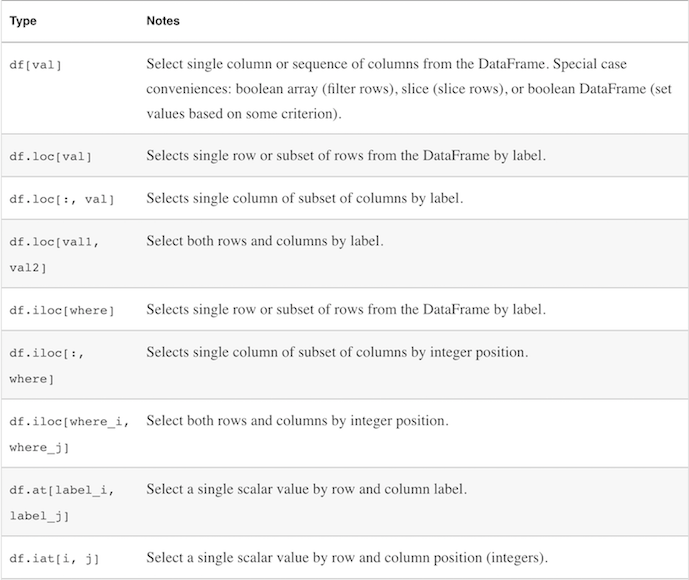

## Arithmetic and Data Alignment

-  An important <code>**pandas**</code> feature is the behavior of arithmetic between objects with different indexes.

-  When adding together objects, if any index pairs are not the same, the respective index in the result will be the **union** of the index pairs. 

-  For users with database experience, this is similar to an automatic **outer join** on the index labels.

-  The internal data alignment introduces <code>**NaN**</code> values in the label locations that don't overlap.

In [64]:
"""
Consider the following two Series objects.
"""
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
# Let's try to add s1 to s2 as follows.
print(s1 + s2)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [65]:
"""
In the case of DataFrame, alignment is performed on both the rows and the columns.
"""
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])
print(df1)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0


In [66]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df2)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


In [67]:
"""
Adding these together returns a DataFrame whose index and columns
are the union of the ones in each DataFrame.
"""
print(df1 + df2)

            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN


In [68]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
print(df1)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0


In [69]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
print(df2)

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [70]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
# df1 + df2 will result in NaN on those unmatched indices
print(df1 + df2)

      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN


In [71]:
"""
In arithmetic operations between differently-indexed objects, 
you might want to fill with a special value, like 0, when an axis label 
is found in one object but not the other.
"""
# Using the add method on df1, we pass df2 and an argument to fill_value
print(df1.add(df2, fill_value=0))

      a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0  11.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0


## Arithmetic Operations

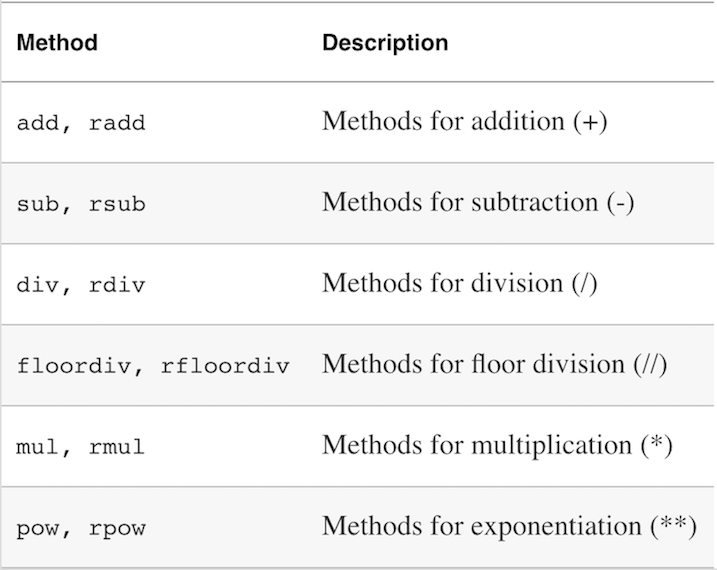

## Operations between <code>DataFrame</code> and <code>Series</code>

-  As with <code>**numpy**</code> arrays of different dimensions, arithmetic between <code>**DataFrame**</code> and <code>**Series**</code> is also defined.

-  Let's first recall again how this works with <code>**numpy**</code>.

In [72]:
# Let's define a two-dimensional numpy array (i.e., a 3-by-4 matrix)
X = np.arange(12).reshape(3,4)
print("X =\n{}".format(X))
# Let's define a one-dimensional numpy array (i.e., a 3-by-1 vector)
y = np.arange(3).reshape(3,1)
print("y =\n{}".format(y))
print()
print("X - y =\n{}".format(X-y))

X =
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
y =
[[0]
 [1]
 [2]]

X - y =
[[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


In [73]:
"""
Let's see the same yet applied to a pandas DataFrame and a Series.
"""
df = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

print("DataFrame:\n{}".format(df))
print()
s = df.iloc[0]
print("Series:\n{}".format(s))

DataFrame:
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

Series:
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


In [74]:
"""
By default, arithmetic between DataFrame and Series matches the index of the Series 
on the DataFrame's columns, broadcasting down the rows.
"""
print(df - s)

          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0


In [75]:
"""
If an index value is not found in either the DataFrame's columns or the Series's index, 
the objects will be reindexed to form the union.
"""
s2 = pd.Series(range(3), index=['b', 'e', 'f'])
print(df + s2)

          b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN


In [76]:
"""
If we want to instead broadcast over the columns, matching on the rows, 
you have to use one of the arithmetic methods. For example:
"""
# Get a Series corresponding to the 'd' column
s3 = df['d']
print(s3)
# Subtract from the DataFrame the Series just extracted using axis
# The axis number is the axis to match on. 
# In this case we mean to match on the DataFrame's row index (axis=0) and broadcast across.
diff_df = df.sub(s3, axis=0) # sub creates a new object
print(diff_df)

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64
          b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0


## Function Application

In [77]:
"""
numpy ufuncs (element-wise array methods) also work with pandas objects.
"""
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df)
print()
print(np.abs(df))

               b         d         e
Utah   -1.151526  2.179898  0.551334
Ohio    1.218424  1.897430  0.808477
Texas   1.424836 -0.739837 -2.014719
Oregon -1.596895  0.063029 -1.310634

               b         d         e
Utah    1.151526  2.179898  0.551334
Ohio    1.218424  1.897430  0.808477
Texas   1.424836  0.739837  2.014719
Oregon  1.596895  0.063029  1.310634


In [78]:
"""
Another frequent operation is applying a function on 1-D arrays to each column or row. 
DataFrame's 'apply' method does exactly this.
"""
# Define an anonymous (i.e., lambda) function
# Note that the argument x here is meant to be an array (not a scalar!)
f = lambda x: x.max() - x.min()
# Apply the lambda function column-wise (default)
print("Column-wise application of lambda:\n{}".format(df.apply(f))) 
# equals to df.apply(f, axis=0)
print()
# Apply the lambda function row-wise
print("Row-wise application of lambda:\n{}".format(df.apply(f, axis=1)))

Column-wise application of lambda:
b    3.021731
d    2.919735
e    2.823196
dtype: float64

Row-wise application of lambda:
Utah      3.331424
Ohio      1.088953
Texas     3.439555
Oregon    1.659924
dtype: float64


## <code>apply</code>

-  The function passed to <code>**apply**</code> is expected to work on a one-dimensional array of data (i.e., a <code>**Series**</code>) as input.

-  It **does not** need to necessarily return a scalar value as output, in fact it can also return a <code>**Series**</code> with multiple values.

-  Many of the most common array statistics (like <code>**sum**</code> and <code>**mean**</code>) are <code>**DataFrame**</code> built-in methods, therefore using <code>**apply**</code> is **not** necessary.

In [79]:
"""
Consider the following function which returns a Series instead of a scalar value.
"""
def foo(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

print(df.apply(foo))

            b         d         e
min -1.596895 -0.739837 -2.014719
max  1.424836  2.179898  0.808477


## <code>applymap</code>

-  Sometimes, we may want to apply a function to each element of the <code>**DataFrame**</code>.

-  In other words, the input of the function to be applied is a scalar rather than a one-dimensional array.

-  <code>**applymap**</code> is the function to be used!

In [80]:
"""
For example, suppose we want to apply a string format to each element of a DataFrame.
"""
# define the function to be applied
str_format = lambda x: '%.2f' % x

print(df.applymap(str_format))

            b      d      e
Utah    -1.15   2.18   0.55
Ohio     1.22   1.90   0.81
Texas    1.42  -0.74  -2.01
Oregon  -1.60   0.06  -1.31


## <code>map</code>

-  The <code>**applymap**</code> function above is implemented through the <code>**map**</code> function available for <code>**Series**</code> objects.

-  In other words, <code>**map**</code> is the <code>**Series**</code>' corresponding of <code>**DataFrame**</code>'s <code>**applymap**</code>.

In [81]:
# Now the function `str_format` is passed as input to Series' `map` function
df['e'].map(str_format)

Utah       0.55
Ohio       0.81
Texas     -2.01
Oregon    -1.31
Name: e, dtype: object

## <code>**apply**</code>, <code>**applymap**</code>, and <code>**map**</code>


Summing up, <code>**apply**</code> works on a row/column basis of a <code>**DataFrame**</code>, <code>**applymap**</code> works element-wise on a <code>**DataFrame**</code>, and <code>**map**</code> works element-wise on a <code>**Series**</code>.

## Sorting by Index Using <code>sort_index</code>

-  To sort lexicographically by row or column index, use the <code>**sort_index**</code> method, which returns a **new**, sorted object (i.e., not *in-place* sorting).

-  <code>**sort_index**</code> works both for <code>**Series**</code> and <code>**DataFrame**</code> objects, with the latter we can sort by index on either axis.

-  By default, data is sorted in **ascending order**, but can be sorted in descending order as well by calling the <code>**sort_index**</code> method with <code>**ascending=False**</code> argument.

In [82]:
"""
Usage of sort_index in Series objects.
"""
# Define a Series object
s = pd.Series(range(4), index=['d', 'a', 'c', 'b'])
print("Original Series:\n{}".format(s))
print()
print("Sort Series by index:\n{}".format(s.sort_index()))

Original Series:
d    0
a    1
c    2
b    3
dtype: int64

Sort Series by index:
a    1
b    3
c    2
d    0
dtype: int64


In [83]:
"""
Using sort_index with DataFrame objects, we can specify which axis the index refers to.
"""
# Create a DataFrame object
df = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
print("Original DataFrame:\n{}".format(df))
print()
# By default, sort_index operates on axis 0 (i.e., rows)
print("Sort DataFrame by row index:\n{}".format(df.sort_index()))

Original DataFrame:
       d  a  b  c
three  0  1  2  3
one    4  5  6  7

Sort DataFrame by row index:
       d  a  b  c
one    4  5  6  7
three  0  1  2  3


In [84]:
print("Original DataFrame:\n{}".format(df))
print()
# sort_index can also operate on axis 1 (i.e., columns)
print("Sort DataFrame by column index:\n{}".format(df.sort_index(axis=1)))

Original DataFrame:
       d  a  b  c
three  0  1  2  3
one    4  5  6  7

Sort DataFrame by column index:
       a  b  c  d
three  1  2  3  0
one    5  6  7  4


## Sorting by Values Using <code>sort_values</code> 

-  Both <code>**Series**</code> and <code>**DataFrame**</code> objects can be sorted by **values** using the <code>**sort_values**</code> method.

-  Sorting the values of a <code>**Series**</code> behaves as expected; by convention, any missing values (<code>**NaN**</code>) are placed at the end of the sorted object.

-  When sorting a <code>**DataFrame**</code>, we can use one or more columns as the sort keys. To do so, we need to pass one or more column names as input arguments of <code>**sort_values**</code>.

-  Again, sorting happens to be in **ascending order** by default but this can be changed using the <code>**ascending=False**</code> argument.

In [85]:
"""
Apply sort_values to a Seres object.
"""
# Create a Series object
s = pd.Series([4, 7, -3, 2])
print("Original Series:\n{}".format(s))
print()
print("Sort Series by values:\n{}".format(s.sort_values()))

Original Series:
0    4
1    7
2   -3
3    2
dtype: int64

Sort Series by values:
2   -3
3    2
0    4
1    7
dtype: int64


In [86]:
"""
Apply sort_values to a Seres object which contains missing values.
"""
# Create a Series object with missing values
s = pd.Series([4, np.nan, 5, -1, np.nan, 2])
print("Original Series:\n{}".format(s))
print()
print("Sort Series by values:\n{}".format(s.sort_values()))

Original Series:
0    4.0
1    NaN
2    5.0
3   -1.0
4    NaN
5    2.0
dtype: float64

Sort Series by values:
3   -1.0
5    2.0
0    4.0
2    5.0
1    NaN
4    NaN
dtype: float64


In [87]:
"""
Apply sort_values to a DataFrame object.
"""
# Create a DataFrame object
df = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print("Original DataFrame:\n{}".format(df))
print()
# Sort values by a single column
print("Sort DataFrame by values contained in column 'b':\n{}"
      .format(df.sort_values(by='b')))

Original DataFrame:
   b  a
0  4  0
1  7  1
2 -3  0
3  2  1

Sort DataFrame by values contained in column 'b':
   b  a
2 -3  0
3  2  1
0  4  0
1  7  1


In [88]:
# Sort values by multiple columns
print("Sort DataFrame by values contained in 2 columns 'a' and 'b':\n{}"
      .format(df.sort_values(by=['a','b'])))
print()
print("Sort DataFrame by values contained in 2 columns 'a' and 'b' (not ascending):\n{}"
      .format(df.sort_values(by=['a','b'], ascending=False)))

Sort DataFrame by values contained in 2 columns 'a' and 'b':
   b  a
2 -3  0
0  4  0
3  2  1
1  7  1

Sort DataFrame by values contained in 2 columns 'a' and 'b' (not ascending):
   b  a
1  7  1
3  2  1
0  4  0
2 -3  0


## Summarizing and Computing Descriptive Statistics

-  <code>**pandas**</code> objects are equipped with a set of common mathematical and statistical methods. 

-  Most of these fall into the category of **reductions** or **summary statistics**

-  Methods that extract a single value (like the **sum** or **mean**) from a <code>**Series**</code> or a <code>**Series**</code> of values from the rows or columns of a <code>**DataFrame**</code>. 

-  Compared with the similar methods of <code>**numpy**</code> arrays, they have built-in handling for missing data. 

In [89]:
# Consider a DataFrame object as follows
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], 
                  index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
print(df)

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


In [90]:
# By default, aggregation function operates on axis 0 (i.e., rows) as usual
# For example, calling the sum method returns a Series containing column-wise sums.
print("Column-wise sum:\n{}".format(df.sum()))
print()
# Instead, if we want row-wise sum, we can of course specify axis=1.
print("Row-wise sum:\n{}".format(df.sum(axis=1)))

Column-wise sum:
one    9.25
two   -5.80
dtype: float64

Row-wise sum:
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64


In [91]:
# Note that NaN values are excluded unless the entire slice (row or column) is NaN. 
# This can be disabled using the skipna option.
print("Row-wise Average including NaN:\n{}".format(df.mean(axis=1, skipna=False)))

Row-wise Average including NaN:
a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64


In [92]:
"""
A useful method is 'describe' which provides multiple summary statistics in one shot.
"""
print(df.describe())

            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000


In [93]:
"""
If the Series or DataFrame object does not contain numeric data 
other statistics are produced.
"""
# Let's create a Series object containing non-numeric data
s = pd.Series(['a', 'a', 'b', 'c'] * 4)
print("Original Series:\n{}".format(s))

Original Series:
0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object


In [94]:
# Now, let's call the describe method
print(s.describe())

count     16
unique     3
top        a
freq       8
dtype: object


## Table of Descriptive and Summary Statistics (1 of 2)

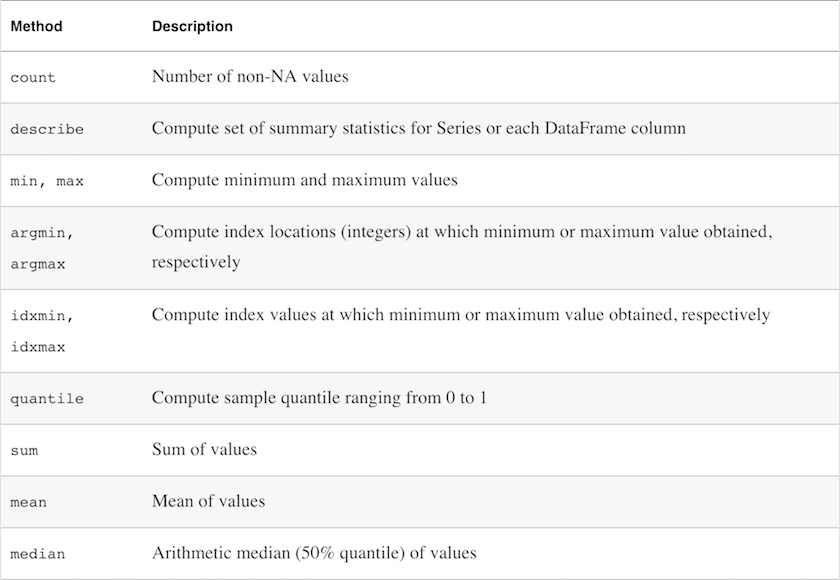

## Table of Descriptive and Summary Statistics (2 of 2)

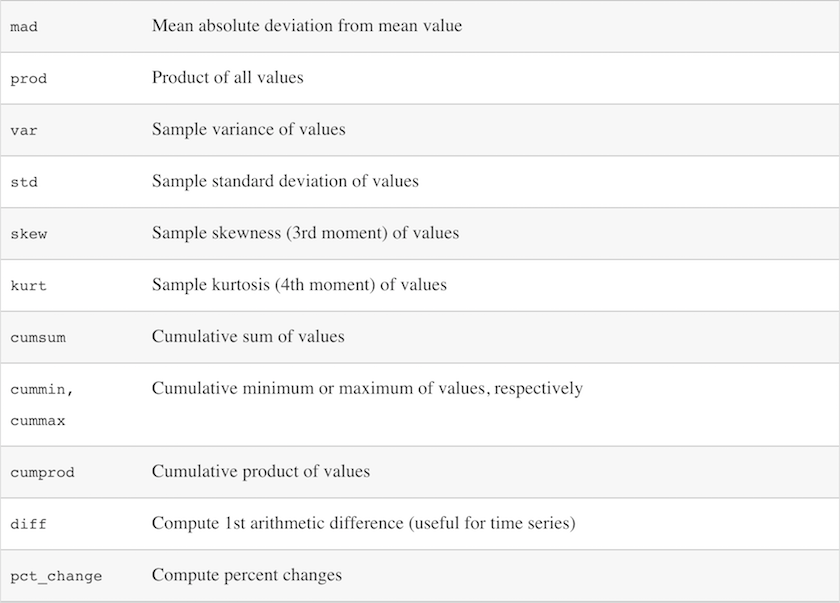

## Unique Values, Value Counts, and Membership

-  <code>**unique**</code> is a function that gives you an array of the unique values in a <code>**Series**</code>.

-  The unique values are not necessarily returned in sorted order, but could be sorted afterwards (e.g., by calling <code>**np.sort()**</code>).

-  <code>**value_counts**</code> computes a <code>**Series**</code> containing value frequencies.

-  <code>**isin**</code> performs a vectorized set membership check.

In [95]:
"""
Usage of unique method.
"""
# Create a Series object
s = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
# Get unique values and store them in a variable
uniques = s.unique()
print("Unique values are: {}".format(uniques))
print("Unique sorted values are: {}".format(np.sort(uniques)))

Unique values are: ['c' 'a' 'd' 'b']
Unique sorted values are: ['a' 'b' 'c' 'd']


In [96]:
"""
Usage of value_counts method.
"""
# Either as a method
print("Value counts:\n{}".format(s.value_counts(sort=False)))
print()
# Or as a built-in pandas function
print("Value counts:\n{}".format(pd.value_counts(s, sort=False)))

Value counts:
a    3
d    1
c    3
b    2
dtype: int64

Value counts:
a    3
d    1
c    3
b    2
dtype: int64


In [97]:
"""
Usage of isin method.
"""
# Create a boolean mask
mask = s.isin(['b', 'c'])
print("Boolean mask:\n{}".format(mask))
print()
print("Accessing elements of the Series object using the mask:\n{}".format(s[mask]))

Boolean mask:
0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

Accessing elements of the Series object using the mask:
0    c
5    b
6    b
7    c
8    c
dtype: object


In [98]:
"""
Many times, it will be useful to compute a histogram on multiple columns in a DataFrame.
"""
data = pd.DataFrame({'Q1': [1, 3, 4, 3, 4],
                     'Q2': [2, 3, 1, 2, 3],
                     'Q3': [1, 5, 2, 4, 4]})

print("Original dataset:\n{}".format(data))
print()
# Passing pandas.value_counts to this DataFrame's apply function gives the following
freq = data.apply(pd.value_counts).fillna(0)
print("Column-wise frequency table:\n{}".format(freq))

Original dataset:
   Q1  Q2  Q3
0   1   2   1
1   3   3   5
2   4   1   2
3   3   2   4
4   4   3   4

Column-wise frequency table:
    Q1   Q2   Q3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0


In [99]:
# If we specify axis=1 the frequency is computed row-wise
freq = data.apply(pd.value_counts, axis=1).fillna(0)
print("Row-wise frequency table:\n{}".format(freq))

Row-wise frequency table:
     1    2    3    4    5
0  2.0  1.0  0.0  0.0  0.0
1  0.0  0.0  2.0  0.0  1.0
2  1.0  1.0  0.0  1.0  0.0
3  0.0  1.0  1.0  1.0  0.0
4  0.0  0.0  1.0  2.0  0.0


## Table of Unique, Value Counts, and Set Membership Methods

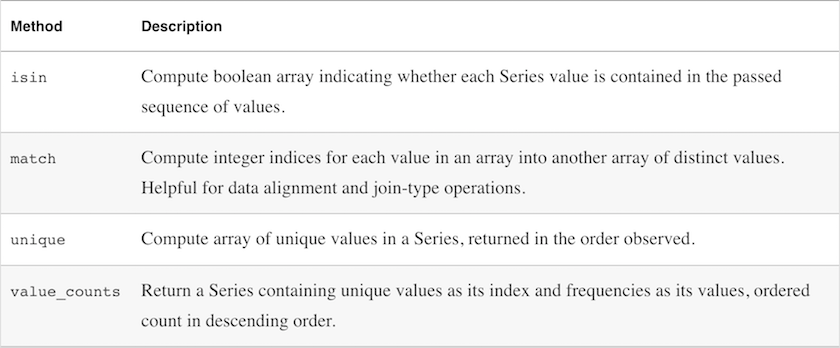